### Load Data & Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from IPython.display import display

from typing import List, Tuple

In [2]:
# !pip install ucimlrepo
# from ucimlrepo import fetch_ucirepo

# fetch dataset
# steel_industry_energy_consumption = fetch_ucirepo(id=851)

# data (as pandas dataframes)
# X = steel_industry_energy_consumption.data.features
# y = steel_industry_energy_consumption.data.targets

# df = X.copy()
# df['Load_Type'] = y.copy()
# df.to_csv('steel_industry_energy_consumption.csv')

df = pd.read_csv('steel_industry_energy_consumption.csv')

### Data Preparation

In [ ]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Usage_kWh,3.17,4.0,3.24,3.31,3.82
Lagging_Current_Reactive.Power_kVarh,2.95,4.46,3.28,3.56,4.5
Leading_Current_Reactive_Power_kVarh,0.0,0.0,0.0,0.0,0.0
CO2(tCO2),0.0,0.0,0.0,0.0,0.0
Lagging_Current_Power_Factor,73.21,66.77,70.28,68.09,64.72
Leading_Current_Power_Factor,100.0,100.0,100.0,100.0,100.0
NSM,900,1800,2700,3600,4500
WeekStatus,Weekday,Weekday,Weekday,Weekday,Weekday
Day_of_week,Monday,Monday,Monday,Monday,Monday


In [4]:
del df['Unnamed: 0']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
 7   WeekStatus                            35040 non-null  object 
 8   Day_of_week                           35040 non-null  object 
 9   Load_Type                             35040 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 2.7+ MB


In [6]:
# Convert columns name to lowercase and replace period to underscore
df.columns = df.columns.str.lower().str.replace(".", "_")

# Get categorical columns name
categorical = list(df.dtypes[(df.dtypes == 'object')].index)

# Convert columns value to lowercase
for col in categorical:
    df[col] = df[col].str.lower()

# Get numerical columns name
numerical = list(df.dtypes[(df.dtypes != 'object')].index)

numerical, categorical

(['usage_kwh',
  'lagging_current_reactive_power_kvarh',
  'leading_current_reactive_power_kvarh',
  'co2(tco2)',
  'lagging_current_power_factor',
  'leading_current_power_factor',
  'nsm'],
 ['weekstatus', 'day_of_week', 'load_type'])

### Exploratory Data Analysis

In [7]:
df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
usage_kwh,35040.0,27.386892,33.444380,0.0,3.20,4.57,51.2375,157.18
lagging_current_reactive_power_kvarh,35040.0,13.035384,16.306000,0.0,2.30,5.00,22.6400,96.91
leading_current_reactive_power_kvarh,35040.0,3.870949,7.424463,0.0,0.00,0.00,2.0900,27.76
co2(tco2),35040.0,0.011524,0.016151,0.0,0.00,0.00,0.0200,0.07
lagging_current_power_factor,35040.0,80.578056,18.921322,0.0,63.32,87.96,99.0225,100.00
leading_current_power_factor,35040.0,84.367870,30.456535,0.0,99.70,100.00,100.0000,100.00
nsm,35040.0,42750.000000,24940.534317,0.0,21375.00,42750.00,64125.0000,85500.00


In [8]:
df[categorical].describe().T

,count,unique,top,freq
weekstatus,35040,2,weekday,25056
day_of_week,35040,7,monday,5088
load_type,35040,3,light_load,18072


In [9]:
for col in categorical:
    print(f'{col}: {set(df[col])}')
    print()

weekstatus: {'weekday', 'weekend'}

day_of_week: {'monday', 'wednesday', 'tuesday', 'saturday', 'friday', 'thursday', 'sunday'}

load_type: {'medium_load', 'light_load', 'maximum_load'}



In [10]:
for col in categorical:
    display(df[col].value_counts(normalize=True))
    print()

weekstatus
weekday    0.715068
weekend    0.284932
Name: proportion, dtype: float64

day_of_week
monday       0.145205
tuesday      0.142466
wednesday    0.142466
thursday     0.142466
friday       0.142466
saturday     0.142466
sunday       0.142466
Name: proportion, dtype: float64

load_type
light_load      0.515753
medium_load     0.276712
maximum_load    0.207534
Name: proportion, dtype: float64

In [11]:
sns.set(font_scale=0.8)

<Axes: >

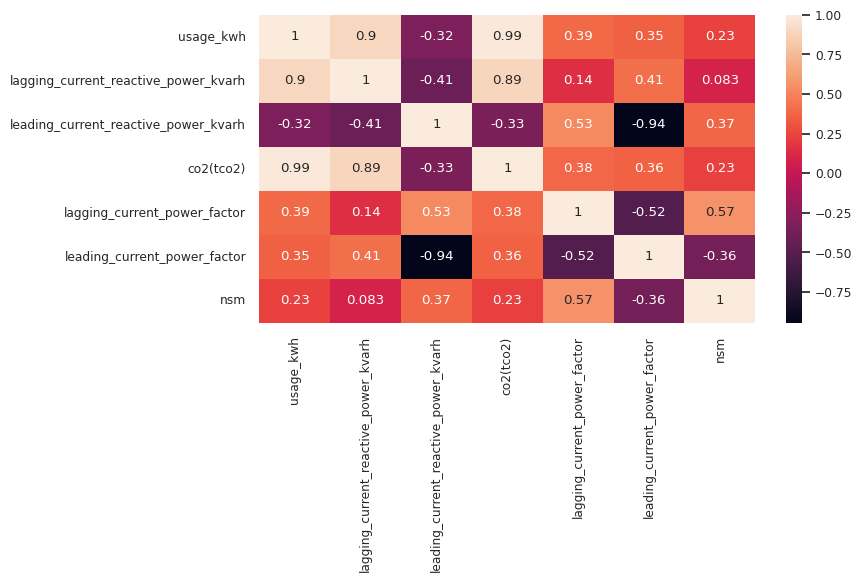

In [12]:
plt.figure(figsize=(8, 4))
sns.heatmap(df[numerical].corr(), annot=True)

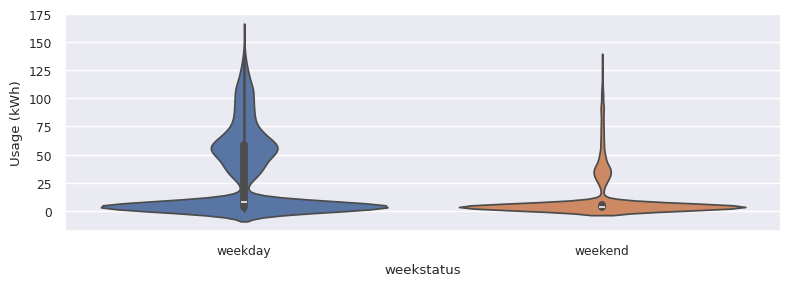

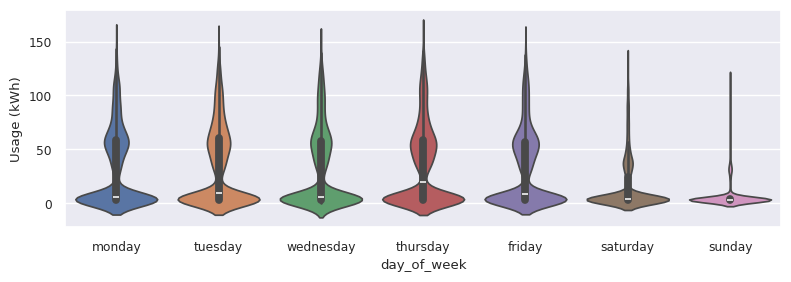

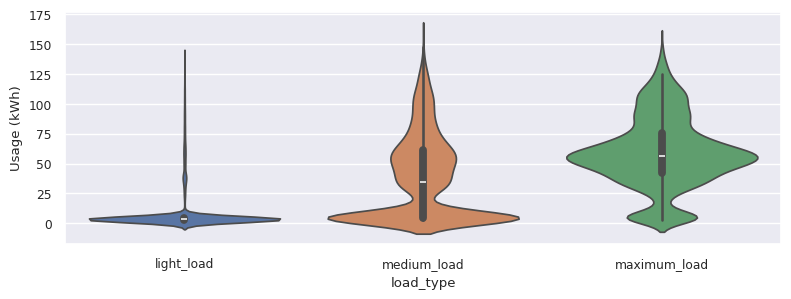

In [13]:
for i, col in enumerate(categorical):
    plt.figure(figsize=(8, 8))
    plt.subplot(3, 1, i+1)
    sns.violinplot(data=df, x=col, y="usage_kwh", hue=col)
    plt.xlabel(col)
    plt.ylabel("Usage (kWh)")
    plt.tight_layout()
    plt.show()

In [14]:
df.head().T

,0,1,2,3,4
usage_kwh,3.17,4.0,3.24,3.31,3.82
lagging_current_reactive_power_kvarh,2.95,4.46,3.28,3.56,4.5
leading_current_reactive_power_kvarh,0.0,0.0,0.0,0.0,0.0
co2(tco2),0.0,0.0,0.0,0.0,0.0
lagging_current_power_factor,73.21,66.77,70.28,68.09,64.72
leading_current_power_factor,100.0,100.0,100.0,100.0,100.0
nsm,900,1800,2700,3600,4500
weekstatus,weekday,weekday,weekday,weekday,weekday
day_of_week,monday,monday,monday,monday,monday
load_type,light_load,light_load,light_load,light_load,light_load


<Axes: xlabel='usage_kwh', ylabel='Count'>

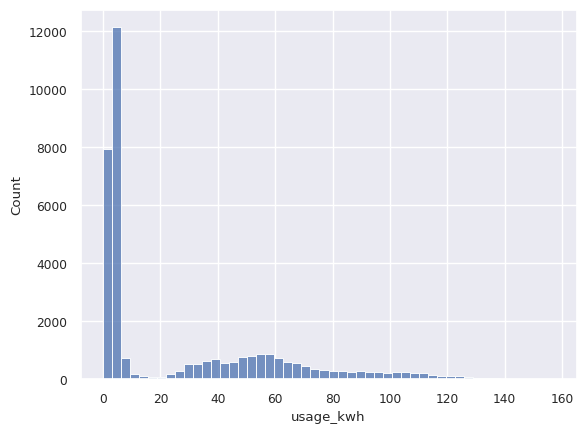

In [15]:
sns.histplot(x=df['usage_kwh'], bins=50)

### Validation Framework

In [16]:
np.random.seed(8)

n = df.shape[0]
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.shuffle(idx)

data_copy = df.copy()
df_train = data_copy.iloc[idx[:n_train]].reset_index(drop=True)
df_val = data_copy.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
df_test = data_copy.iloc[idx[n_train+n_val:]].reset_index(drop=True)

y_train = df_train['usage_kwh'].values
y_val = df_val['usage_kwh'].values
y_test = df_test['usage_kwh'].values

del df_train['usage_kwh']
del df_val['usage_kwh']
del df_test['usage_kwh']



### Feature Engineering

In [17]:
numerical = [col for col in numerical if col != 'usage_kwh']
numerical

['lagging_current_reactive_power_kvarh',
 'leading_current_reactive_power_kvarh',
 'co2(tco2)',
 'lagging_current_power_factor',
 'leading_current_power_factor',
 'nsm']

In [18]:
dicts_cat = {}
for col in categorical:
    dicts_cat[col] = df[col].value_counts().sort_values().index.to_list()

In [19]:
def prepare_X(data: pd.DataFrame) -> np.ndarray:
    X = data.copy()

    if 'object' in X.dtypes.values:
        for k, v in dicts_cat.items():
            for value in v:
                X[f'{k}={value}'] = (X[k] == value).astype(int)
            del X[k]

    return X.values

### Train Data

In [20]:
def train_linear_regression(X: np.ndarray, y: np.ndarray) -> Tuple[float, np.ndarray]:
    ones = np.ones(X.shape[0])
    X = np.column_stack((ones, X))
    XTX = np.dot(X.T, X)
    # XTX = XTX + 0.001 * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv @ X.T @ y

    return w_full[0], w_full[1:]

In [21]:
def rmse(y_act, y_pred):
    se = (y_act - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

#### *Train using only numerical features*

intercept
-13.465667237108395

coef
[3.03970258e-01 1.35874524e-01 1.68417253e+03 1.26582528e-01
 7.52873133e-02 9.49479004e-06]

rmse: 5.055690703761736


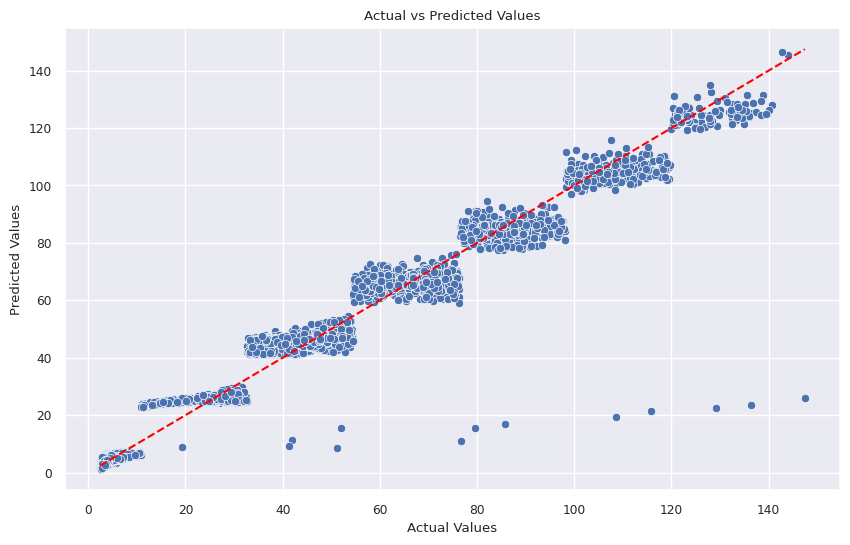

In [22]:
X_train = prepare_X(df_train[numerical])

intercept, coef = train_linear_regression(X_train, y_train)
y_train_pred = intercept + np.dot(X_train, coef)

X_val = prepare_X(df_val[numerical])
y_val_pred = intercept + X_val.dot(coef)

print('intercept')
print(f'{intercept}')
print()
print('coef')
print(f'{coef}')
print()
print(f'rmse: {rmse(y_val, y_val_pred)}')
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=y_val_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')
plt.show()

#### *Train using numerical + categorical features*

intercept
-3.1647564217808604e+16

coef
[ 6.03621258e+01  3.99008161e+01 -8.57846537e+04  3.64976329e+01
  2.64331453e+01  2.55148122e-03 -1.72906876e+15  3.82776166e+16
 -6.63005236e+15 -6.63005236e+15 -6.63005236e+15 -6.63005236e+15
  3.33766330e+16  3.33766330e+16 -6.63005236e+15  1.41735950e+02
  1.40115555e+02  1.93598682e+02]

rmse: 496.27339806556216


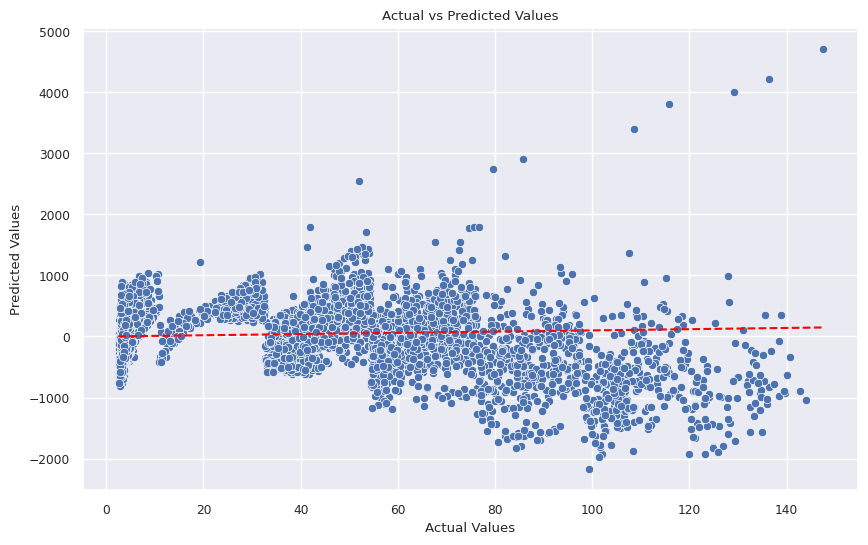

In [23]:
X_train = prepare_X(df_train)

intercept, coef = train_linear_regression(X_train, y_train)
y_train_pred = intercept + np.dot(X_train, coef)

X_val = prepare_X(df_val)
y_val_pred = intercept + X_val.dot(coef)

print('intercept')
print(f'{intercept}')
print()
print('coef')
print(f'{coef}')
print()
print(f'rmse: {rmse(y_val, y_val_pred)}')
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=y_val_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')
plt.show()

### Regularization

In [24]:
alphas = [0, 1e-010, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

In [25]:
# training function with regularization
def train_linear_regression_reg(X: np.ndarray, y: np.ndarray, alpha: float) -> Tuple[float, np.ndarray]:
    ones = np.ones(X.shape[0])
    X = np.column_stack((ones, X))
    XTX = np.dot(X.T, X)
    XTX = XTX + alpha * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv @ X.T @ y

    return w_full[0], w_full[1:]

In [26]:
for alpha in alphas:
    X_train = prepare_X(df_train)
    
    intercept, coef = train_linear_regression_reg(X_train, y_train, alpha)
    y_train_pred = intercept + np.dot(X_train, coef)
    
    X_val = prepare_X(df_val)
    y_val_pred = intercept + X_val.dot(coef)
    
    print('%06s %f' % (alpha, rmse(y_val, y_val_pred)))

     0 496.273398
 1e-10 5.074191
 1e-09 5.038015
 1e-08 5.027912
 1e-07 5.029020
 1e-06 5.029019
 1e-05 5.028997
0.0001 5.028921
 0.001 5.028198
  0.01 5.023256
   0.1 5.136868
     1 7.295742
    10 9.307961
   100 9.756915


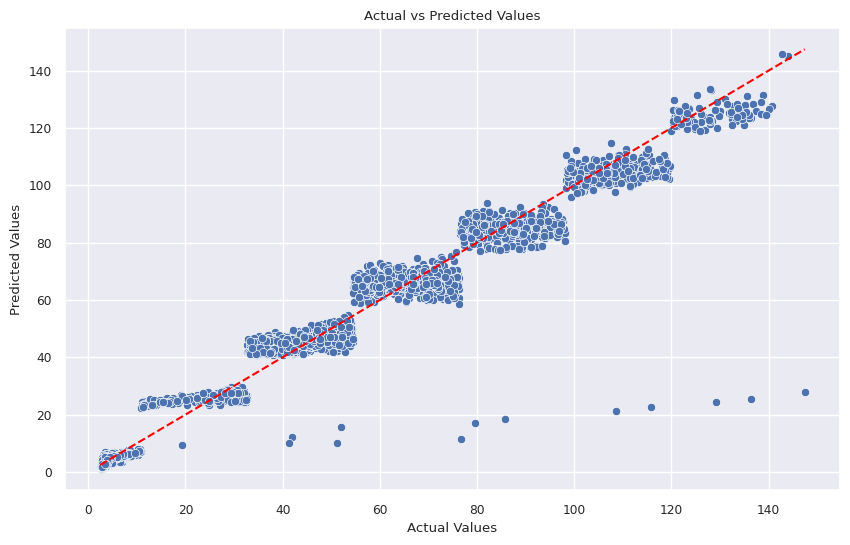

In [32]:
X_train = prepare_X(df_train)

intercept, coef = train_linear_regression_reg(X_train, y_train, 1e-08)
y_train_pred = intercept + np.dot(X_train, coef)

X_val = prepare_X(df_val)
y_val_pred = intercept + X_val.dot(coef)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=y_val_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')
plt.show()

### Using Model

In [28]:
df_train_full = pd.concat([df_train, df_val])
df_train_full = df_train_full.reset_index(drop=True)

y_train_full = np.concat((y_train, y_val))

intercept
-5.550145536944598

coef
[ 3.36897550e-01  6.75128080e-02  1.62782487e+03  1.26729771e-01
  6.27206544e-02 -2.75063253e-06 -2.43957058e+00 -3.10883188e+00
 -7.91213585e-02 -6.66325122e-01 -8.45045327e-01 -7.39018092e-01
 -1.06527587e+00 -1.37450649e+00 -7.79324987e-01 -1.53063511e+00
 -1.06671604e+00 -2.95212554e+00]

rmse: 5.027912448360352


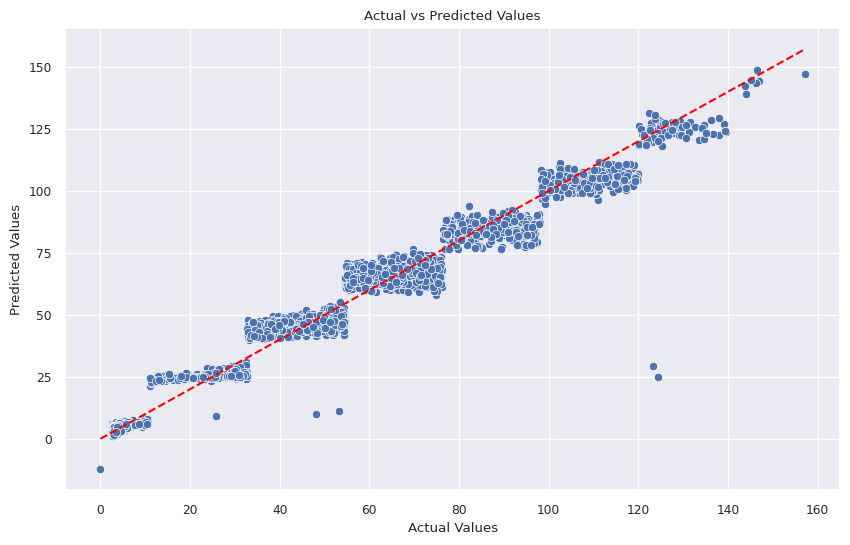

In [29]:
X_train_full = prepare_X(df_train_full)

intercept, coef = train_linear_regression_reg(X_train_full, y_train_full, 0.01)

X_test = prepare_X(df_test)
y_test_pred = intercept + X_test.dot(coef)

print('intercept')
print(f'{intercept}')
print()
print('coef')
print(f'{coef}')
print()
print(f'rmse: {rmse(y_val, y_val_pred)}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

In [30]:
df_test.iloc[26]

lagging_current_reactive_power_kvarh           14.83
leading_current_reactive_power_kvarh             0.0
co2(tco2)                                       0.02
lagging_current_power_factor                    95.8
leading_current_power_factor                   100.0
nsm                                            53100
weekstatus                                   weekend
day_of_week                                 saturday
load_type                               maximum_load
Name: 26, dtype: object

In [31]:
df_small = df_test.iloc[26:27]
X_small = prepare_X(df_small)
y_small = y_test[26]
y_small_test = round(intercept + X_small.dot(coef)[0], 2)

X_small, y_small, y_small_test

(array([[1.483e+01, 0.000e+00, 2.000e-02, 9.580e+01, 1.000e+02, 5.310e+04,
         1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00]]),
 np.float64(49.57),
 np.float64(44.92))